Ayush Uthaiah B M (1CD24CS043)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [20]:

df = pd.read_csv('/content/Demand_Forecasting_Dataset.csv')



In [21]:
print("Initial Data Info:")
print(df.info())
print(df.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              36 non-null     int64  
 1   Price              36 non-null     float64
 2   Income             36 non-null     int64  
 3   Seasonality_Index  36 non-null     float64
 4   Demand             36 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.5 KB
None
   Month  Price  Income  Seasonality_Index  Demand
0      1  10.62    2609               5.00     175
1      2  14.66    2195               8.66     141
2      3  13.12    3368              10.00     178
3      4  12.19    2880               8.66     170
4      5   9.09    2244               5.00     169


In [22]:

print("Missing values:\n", df.isnull().sum())


df_cleaned = df.drop_duplicates()


print("Statistics:\n", df_cleaned.describe())


df_cleaned.to_csv('Cleaned_Demand_Forecasting_Data.csv', index=False)

Missing values:
 Month                0
Price                0
Income               0
Seasonality_Index    0
Demand               0
dtype: int64
Statistics:
           Month      Price       Income  Seasonality_Index      Demand
count  36.00000  36.000000    36.000000          36.000000   36.000000
mean    6.50000  11.251944  2942.750000           0.000000  171.055556
std     3.50102   2.117790   617.404353           7.171266   23.831485
min     1.00000   8.140000  2069.000000         -10.000000  119.000000
25%     3.75000   9.277500  2395.750000          -5.915000  157.750000
50%     6.50000  11.105000  2828.500000           0.000000  170.500000
75%     9.25000  13.000000  3545.500000           5.915000  181.750000
max    12.00000  14.790000  3974.000000          10.000000  224.000000


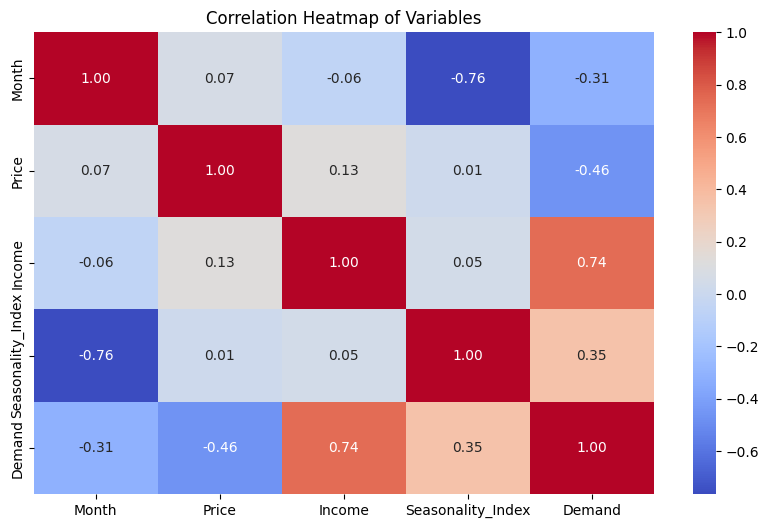

In [23]:

plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Variables')
plt.savefig('correlation_heatmap.png')
plt.show()

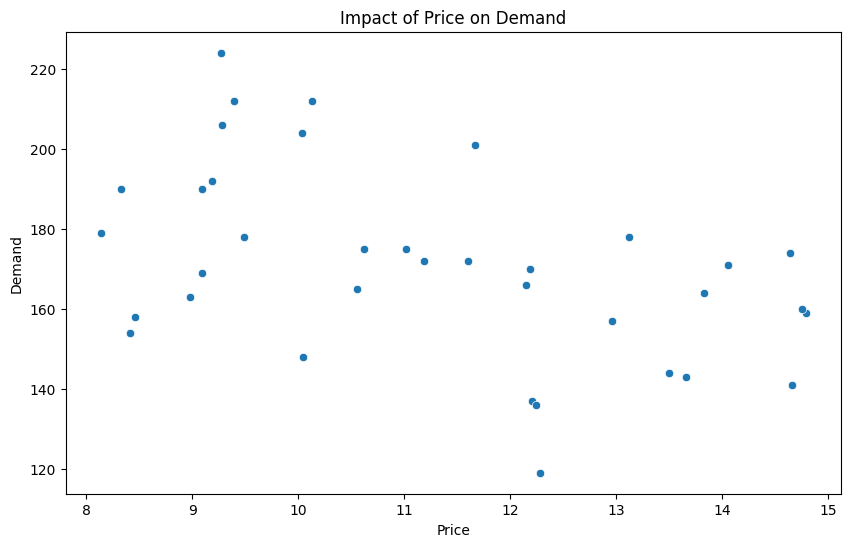

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Price', y='Demand')
plt.title('Impact of Price on Demand')
plt.savefig('price_vs_demand.png')
plt.show()

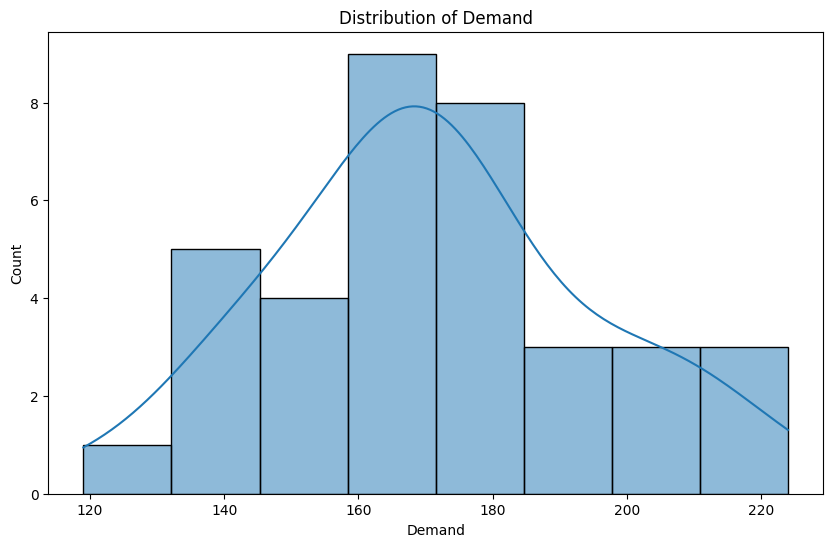

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Demand'], kde=True)
plt.title('Distribution of Demand')
plt.savefig('demand_distribution.png')
plt.show()

In [26]:
X = df_cleaned.drop(columns=['Demand'])
y = df_cleaned['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

Linear Regression Performance:
MSE: 11.52
R2 Score: 0.98


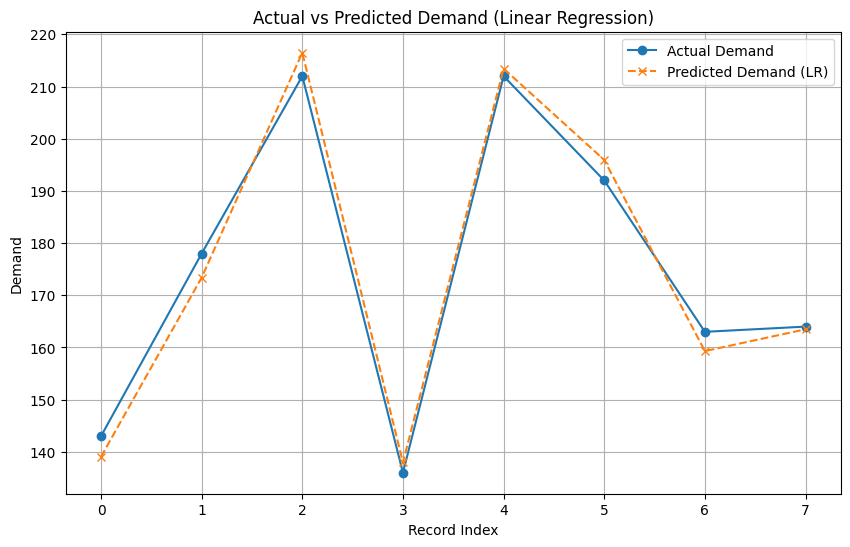

In [28]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:\nMSE: {mse:.2f}\nR2 Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual Demand', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Demand (LR)', marker='x', linestyle='--')
plt.title('Actual vs Predicted Demand (Linear Regression)')
plt.xlabel('Record Index')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.savefig('lr_actual_vs_predicted.png')
plt.show()

In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Model Accuracy (R2 Score): 0.9354
Mean Squared Error: 47.18


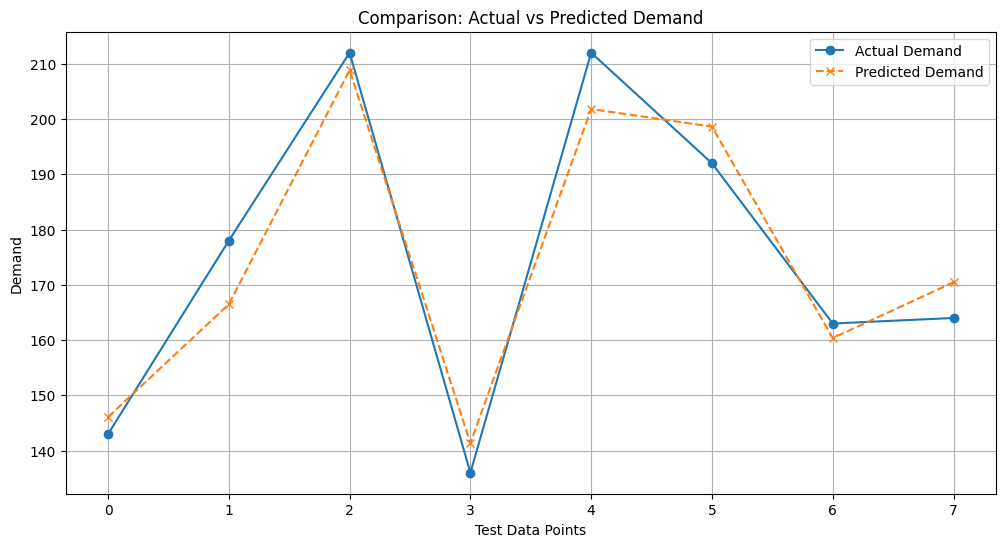

In [30]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Accuracy (R2 Score): {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual Demand', marker='o', linestyle='-')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Demand', marker='x', linestyle='--')
plt.title('Comparison: Actual vs Predicted Demand')
plt.xlabel('Test Data Points')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()